### 데이터 불러오기

In [1]:
#라이브러리 불러오기
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 데이터 불러오기
iris = datasets.load_iris()
features = iris.data

# 데이터프레임 생성
species = pd.DataFrame(iris.target)
species.columns = ['Species']
data = pd.DataFrame(iris.data)
data.columns = ['Sepal_length','Sepal_width','Petal_length','Petal_width']
data = pd.concat([data, species],axis=1) 
data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [56]:
iris.head()

AttributeError: head

### 데이터 시각화

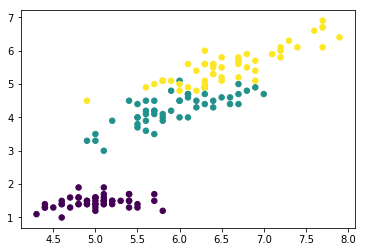

In [16]:
# 시각화에 자주 사용되는 라이브러리(matplotlib과 seaborn은 기억해 두는 것이 좋다.)
import matplotlib.pyplot as plt
import seaborn as sns

# s(size)=데이터 포인트크기, c(color)=데이터 포인트색깔() 
plt.scatter(data.Sepal_length, data.Petal_length,s=30,c=data.Species)  
plt.show()

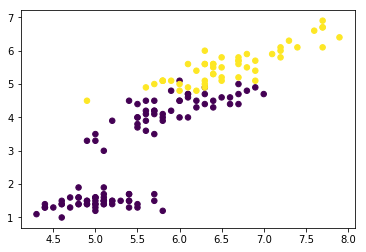

In [28]:
plt.scatter(data.Sepal_length, data.Petal_length,s=30,c=data.Species==0|2)  
plt.show()

### SVM 모델 생성

In [4]:
from sklearn.svm import SVC

setosa_or_versicolor = (data.Species == 0) | (data.Species == 1) # Species가 0,1일때 각각의 품종은 Setosa, Versicolor이다.
X = data[setosa_or_versicolor] # 
y = data.Species[setosa_or_versicolor]

# SVM 분류 모델
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

In [ ]:
fig = plt.figure(figsize=(10,2))
sns.countplot(y='target', data=train)
print(train.Survived.value_counts)

#### 데이터 생성